In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scs
%matplotlib inline

In [5]:
data = pd.read_csv("data3a.csv",dtype={"y": int,"x":float, "f":"category"})

In [6]:
data

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C
5,4,8.32,C
6,9,10.61,C
7,9,10.06,C
8,9,9.93,C
9,11,10.43,C


In [7]:
data.shape

(100, 3)

In [8]:
data.x

0      8.31
1      9.44
2      9.50
3      9.07
4     10.16
5      8.32
6     10.61
7     10.06
8      9.93
9     10.43
10    10.36
11    10.15
12    10.92
13     8.85
14     9.42
15    11.11
16     8.02
17    11.93
18     8.55
19     7.19
20     9.83
21    10.79
22     8.89
23    10.09
24    11.63
25    10.21
26     9.45
27    10.44
28     9.44
29    10.48
      ...  
70    10.54
71    11.30
72    12.40
73    10.18
74     9.53
75    10.24
76    11.76
77     9.52
78    10.40
79     9.96
80    10.30
81    11.54
82     9.42
83    11.28
84     9.73
85    10.78
86    10.21
87    10.51
88    10.73
89     8.85
90    11.20
91     9.86
92    11.54
93    10.03
94    11.88
95     9.15
96     8.52
97    10.24
98    10.86
99     9.97
Name: x, Length: 100, dtype: float64

In [9]:
data.f

0     C
1     C
2     C
3     C
4     C
5     C
6     C
7     C
8     C
9     C
10    C
11    C
12    C
13    C
14    C
15    C
16    C
17    C
18    C
19    C
20    C
21    C
22    C
23    C
24    C
25    C
26    C
27    C
28    C
29    C
     ..
70    T
71    T
72    T
73    T
74    T
75    T
76    T
77    T
78    T
79    T
80    T
81    T
82    T
83    T
84    T
85    T
86    T
87    T
88    T
89    T
90    T
91    T
92    T
93    T
94    T
95    T
96    T
97    T
98    T
99    T
Name: f, Length: 100, dtype: category
Categories (2, object): [C, T]

In [10]:
data.f.dtype

CategoricalDtype(categories=['C', 'T'], ordered=False)

In [11]:
data.describe()

,y,x
count,100.000000,100.000000
mean,7.830000,10.089100
std,2.624881,1.008049
min,2.000000,7.190000
25%,6.000000,9.427500
50%,8.000000,10.155000
75%,10.000000,10.685000
max,15.000000,12.400000


In [12]:
data.f.describe()

count     100
unique      2
top         T
freq       50
Name: f, dtype: object

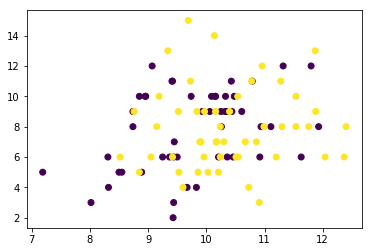

In [13]:
plt.scatter(data.x,data.y,c=data.f.cat.codes)

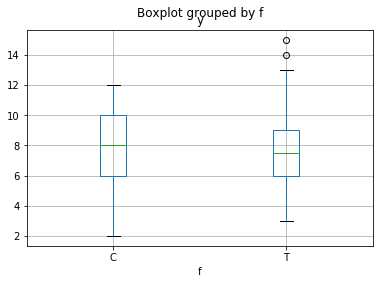

In [14]:
data.boxplot(column='y',by='f')

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.glm('y ~ x',data=data,family=sm.families.Poisson())

/Users/yukodama/work/statistical-modeling-python/venv/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [16]:
result = model.fit()


In [18]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Wed, 04 Apr 2018   Deviance:                       84.993
Time:                        10:46:09   Pearson chi2:                     83.8
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

In [19]:
result.params / result.bse

Intercept    3.551742
x            2.125084
dtype: float64

In [20]:
result.llf # log likelihood

-235.38625076986077

### ポアソン回帰モデルによる予測

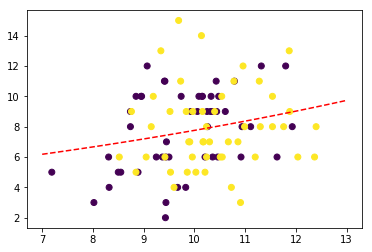

In [21]:
x= np.linspace(7,13,100)
y = np.exp(result.params["Intercept"] + x*result.params["x"])

plt.scatter(data.x,data.y,c=data.f.cat.codes)
plt.plot(x,y,"r--")
plt.show()

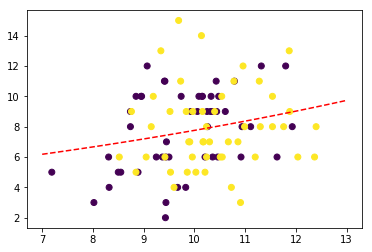

In [22]:
x = np.linspace(7,13,100)

plt.scatter(data.x,data.y,c=data.f.cat.codes)
plt.plot(x,result.predict({"x":x}),"r--")
plt.show()

In [23]:
model = smf.glm('y ~ f',data=data,family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Wed, 04 Apr 2018   Deviance:                       89.475
Time:                        10:47:45   Pearson chi2:                     87.1
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0516      0.051     40.463      0.000       1.952       2.151
f[T.T]         0.0128      0.071      0.179      0.858      -0.127       0.153
==============================================================================
"""

In [24]:
result.llf

-237.62725696068685

In [25]:
data.head()

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C


In [26]:
model = smf.glm('y ~ x + f',data=data,family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Wed, 04 Apr 2018   Deviance:                       84.808
Time:                        10:48:14   Pearson chi2:                     83.8
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2631      0.370      3.417      0.001       0.539       1.988
f[T.T]        -0.0320      0.074     -0.430      0.667      -0.178       0.114
x              0.0801      0.037      2.162      0.031       0.007       0.153
==============================================================================
"""

In [27]:
result.llf


-235.2937192424937

In [28]:
result.df_model

2